11. q40 training competitors q15 years using ml q3 age q5 puesto 
¿Qué empresa de formación se elige en función de la experiencia en ML y el puesto que se ostenta?


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [2]:
# Cargo el dataframe con fichero del total seleccionado
df = pd.read_csv('data_seleccionada.csv', index_col = 0)
df.head(2)

,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"


In [5]:
# Saco un dataframe unicamente de los courses para sacar los nombres y renombar otros dataframes
dfcourses = df[['q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11']]
dfcourses.describe().T

,count,unique,top,freq
q40_part_1,9649,1,Coursera,9649
q40_part_2,3028,1,edX,3028
q40_part_3,8670,1,Kaggle Learn Courses,8670
q40_part_4,3996,1,DataCamp,3996
q40_part_5,1157,1,Fast.ai,1157
q40_part_6,2803,1,Udacity,2803
q40_part_7,6440,1,Udemy,6440
q40_part_8,2693,1,LinkedIn Learning,2693
q40_part_9,1804,1,"Cloud-certification programs (direct from AWS,...",1804
q40_part_10,4882,1,University Courses (resulting in a university ...,4882


In [3]:
# Selecciono las columnas que nos interesan
df2 = df[['q_5_role','q_15_years_using_ml', 'q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11']]
df2.head(15)

,q_5_role,q_15_years_using_ml,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
0,Other,5-10 years,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN
1,Program/Project Manager,< 1 year,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN
2,Software Engineer,I do not use machine learning methods,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Research Scientist,5-10 years,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Other,10-20 years,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN
5,Currently not employed,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",NaN,NaN
6,Student,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data Scientist,2-3 years,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,LinkedIn Learning,NaN,NaN,NaN
8,Currently not employed,< 1 year,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Other,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN


In [10]:
# Contamos la frecuencia de cada formación en base a la experiencia y al puesto de trabajo
frecuencias_courses_experience = df2.groupby(['q_15_years_using_ml', 'q_5_role']).count()
frecuencias_courses_experience

q40_part_1  \
q_15_years_using_ml                   q_5_role                                   
1-2 years                             Business Analyst                      60   
                                      Currently not employed               140   
                                      DBA/Database Engineer                 13   
                                      Data Analyst                         191   
                                      Data Engineer                         73   
                                      Data Scientist                       385   
                                      Developer Relations/Advocacy           5   
                                      Machine Learning Engineer            156   
                                      Other                                145   
                                      Product Manager                       25   
                                      Program/Project Manager               56   
                                      Research Scientist                   120   
                                      Software Engineer                    197   
                                      Statistician                          16   
                                      Student                              484   
10-20 years                           Business Analyst                       4   
                                      Currently not employed                 3   
                                      DBA/Database Engineer                  1   
                                      Data Analyst                           6   
                                      Data Engineer                          1   
                                      Data Scientist                        74   
                                      Developer Relations/Advocacy           1   
                                      Machine Learning Engineer             20   
                                      Other                                 18   
                                      Product Manager                        1   
                                      Program/Project Manager                7   
                                      Research Scientist                    45   
                                      Software Engineer                      7   
                                      Statistician                           6   
                                      Student                                1   
2-3 years                             Business Analyst                      28   
                                      Currently not employed                54   
                                      DBA/Database Engineer                  7   
                                      Data Analyst                         100   
                                      Data Engineer                         48   
                                      Data Scientist                       281   
                                      Developer Relations/Advocacy           4   
                                      Machine Learning Engineer            123   
                                      Other                                 81   
                                      Product Manager                       13   
                                      Program/Project Manager               58   
                                      Research Scientist                    82   
                                      Software Engineer                    126   
                                      Statistician                           7   
                                      Student                              124   
20 or more years                      Business Analyst                       0   
                                      Currently not employed                 3   
                                      Data Analyst

In [11]:
# Renombrando la tabla de frecuencias para ver mejor los valores de cada variable. Para ello he extraido los valores del dataframe describe()
lista_nuevas_cols = list(dfcourses.describe().T['top'].values)
lista_nuevas_cols

['Coursera',
 'edX',
 'Kaggle Learn Courses',
 'DataCamp',
 'Fast.ai',
 'Udacity',
 'Udemy',
 'LinkedIn Learning',
 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 'University Courses (resulting in a university degree)',
 'None']

In [12]:
antiguas_cols = list(frecuencias_courses_experience.columns)
antiguas_cols

['q40_part_1',
 'q40_part_2',
 'q40_part_3',
 'q40_part_4',
 'q40_part_5',
 'q40_part_6',
 'q40_part_7',
 'q40_part_8',
 'q40_part_9',
 'q40_part_10',
 'q40_part_11']

In [13]:
dict_rename = dict(zip(antiguas_cols, lista_nuevas_cols))

In [14]:
frecuencias_courses_experience.rename(columns=dict_rename, inplace=True )
frecuencias_courses_experience

Coursera  \
q_15_years_using_ml                   q_5_role                                 
1-2 years                             Business Analyst                    60   
                                      Currently not employed             140   
                                      DBA/Database Engineer               13   
                                      Data Analyst                       191   
                                      Data Engineer                       73   
                                      Data Scientist                     385   
                                      Developer Relations/Advocacy         5   
                                      Machine Learning Engineer          156   
                                      Other                              145   
                                      Product Manager                     25   
                                      Program/Project Manager             56   
                                      Research Scientist                 120   
                                      Software Engineer                  197   
                                      Statistician                        16   
                                      Student                            484   
10-20 years                           Business Analyst                     4   
                                      Currently not employed               3   
                                      DBA/Database Engineer                1   
                                      Data Analyst                         6   
                                      Data Engineer                        1   
                                      Data Scientist                      74   
                                      Developer Relations/Advocacy         1   
                                      Machine Learning Engineer           20   
                                      Other                               18   
                                      Product Manager                      1   
                                      Program/Project Manager              7   
                                      Research Scientist                  45   
                                      Software Engineer                    7   
                                      Statistician                         6   
                                      Student                              1   
2-3 years                             Business Analyst                    28   
                                      Currently not employed              54   
                                      DBA/Database Engineer                7   
                                      Data Analyst                       100   
                                      Data Engineer                       48   
                                      Data Scientist                     281   
                                      Developer Relations/Advocacy         4   
                                      Machine Learning Engineer          123   
                                      Other                               81   
                                      Product Manager                     13   
                                      Program/Project Manager             58   
                                      Research Scientist                  82   
                                      Software Engineer                  126   
                                      Statistician                         7   
                                      Student                            124   
20 or more years                      Business Analyst                     0   
                                      Currently not employed               3   
                                      Data Analyst                         2   
                                      Data Engineer                 

In [19]:
# Creando un nuevo df sin la columna "role" para hacer un gráfico de frecuencia de cursos según los años de experiencia en ML
df3 = df2[['q_15_years_using_ml', 'q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11']]
df3.head(1)

,q_15_years_using_ml,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
0,5-10 years,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN


In [21]:
frecuencias_courses_experience2 = df3.groupby(['q_15_years_using_ml']).count()
frecuencias_courses_experience2

,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11
q_15_years_using_ml,,,,,,,,,,,
1-2 years,2066,601,1880,870,240,639,1454,582,409,1147,232
10-20 years,195,63,95,53,37,59,91,47,35,133,42
2-3 years,1136,356,891,449,193,349,689,308,210,620,143
20 or more years,91,38,52,32,22,28,38,25,8,66,36
3-4 years,591,217,400,267,129,208,355,135,106,370,73
4-5 years,527,191,314,179,106,189,261,104,109,266,78
5-10 years,607,239,317,191,100,201,280,120,116,339,77
< 1 year,3135,905,3519,1369,238,817,2330,923,591,1426,506
I do not use machine learning methods,984,310,961,444,56,229,731,305,142,390,437


In [22]:
# Renombrando
frecuencias_courses_experience2.rename(columns=dict_rename, inplace=True )
frecuencias_courses_experience2

,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",University Courses (resulting in a university degree),None
q_15_years_using_ml,,,,,,,,,,,
1-2 years,2066,601,1880,870,240,639,1454,582,409,1147,232
10-20 years,195,63,95,53,37,59,91,47,35,133,42
2-3 years,1136,356,891,449,193,349,689,308,210,620,143
20 or more years,91,38,52,32,22,28,38,25,8,66,36
3-4 years,591,217,400,267,129,208,355,135,106,370,73
4-5 years,527,191,314,179,106,189,261,104,109,266,78
5-10 years,607,239,317,191,100,201,280,120,116,339,77
< 1 year,3135,905,3519,1369,238,817,2330,923,591,1426,506
I do not use machine learning methods,984,310,961,444,56,229,731,305,142,390,437


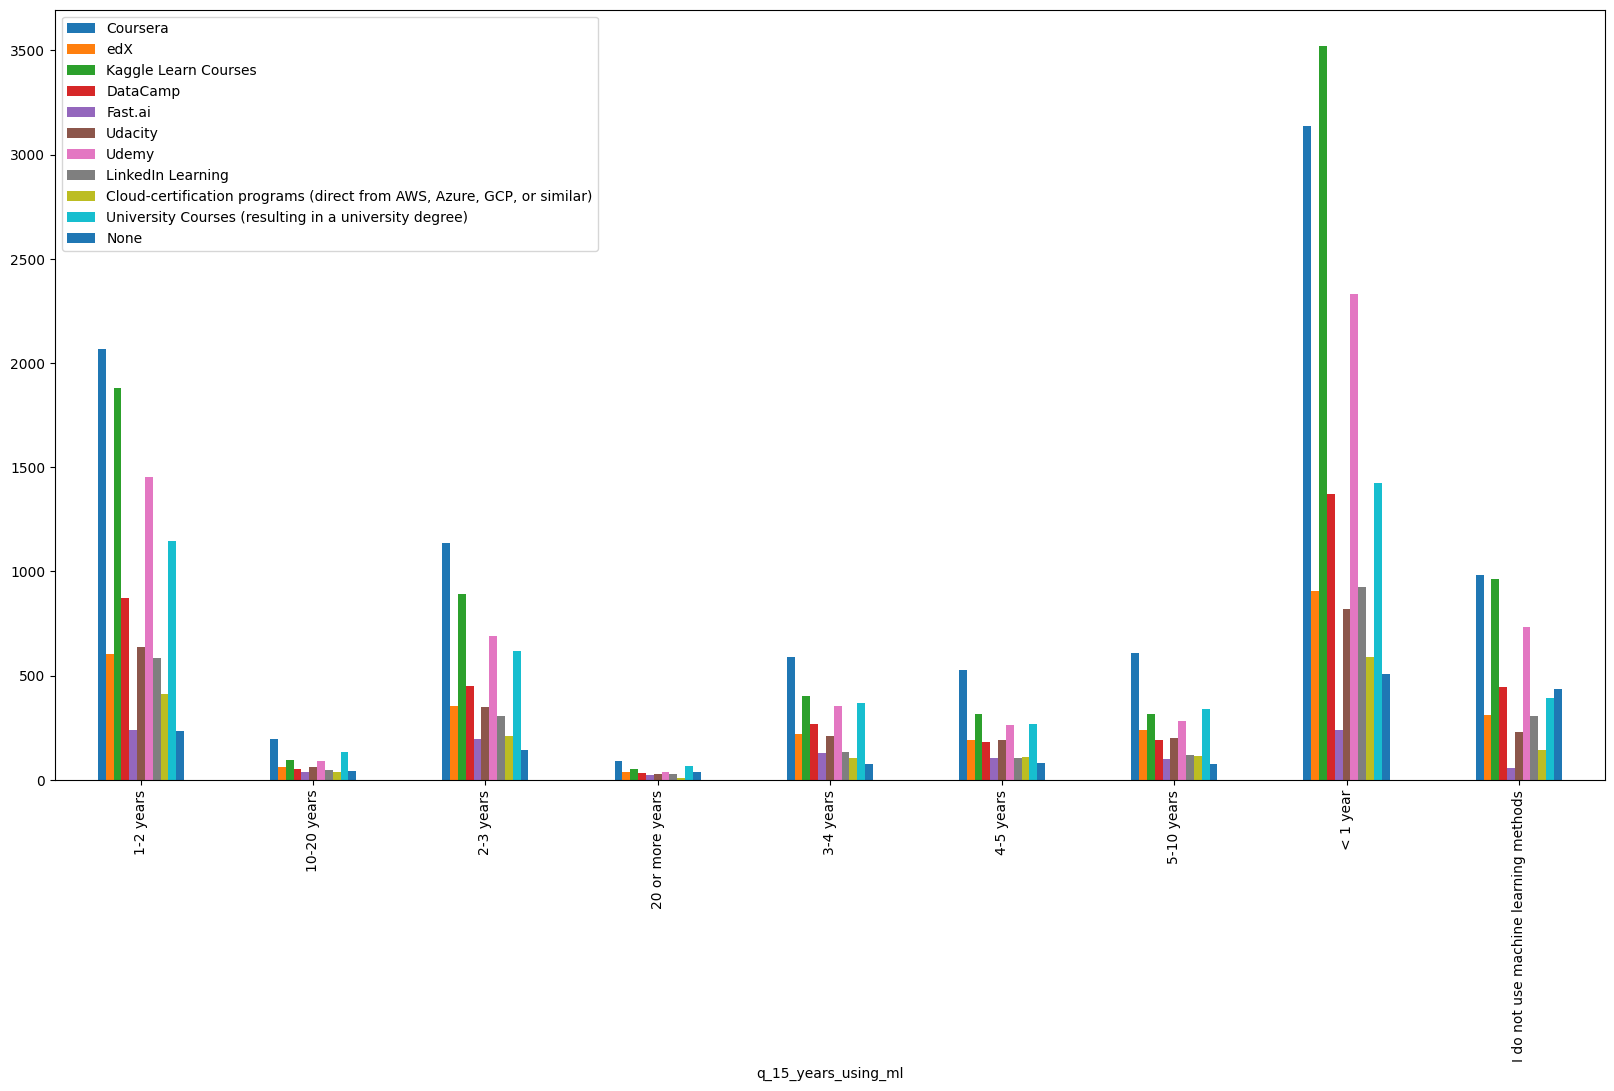

In [28]:
frecuencias_courses_experience2.plot.bar(figsize= (20,10));

> * Interpretamos que hay menos gente en este estudio que tenga mucha experiencia en ML, y que la mayoría de los encuestados tienen menos de 1 año de experiencia
> * Respondiendo a la pregunta 11, los cursos elegidos no varían mucho segun la experiencia:
>   * En primer lugar esta `Coursera`
>   * En segundo lugar `Kaggel`
>   * En tercer lugar `Udemy`, en ciertos casos reñido con `cursos universitarios`,
>   * En quinto lugar los `Datacamps`
>##### Conclusion
>Los `Datacamps` se encuentran entre las primeras cinco opciones (de 11) que las personas del sector data eligen para formarse